# Hybrid Code Network for End-to-End Dialogue 

### *There are some points by which we can improve our existing model*

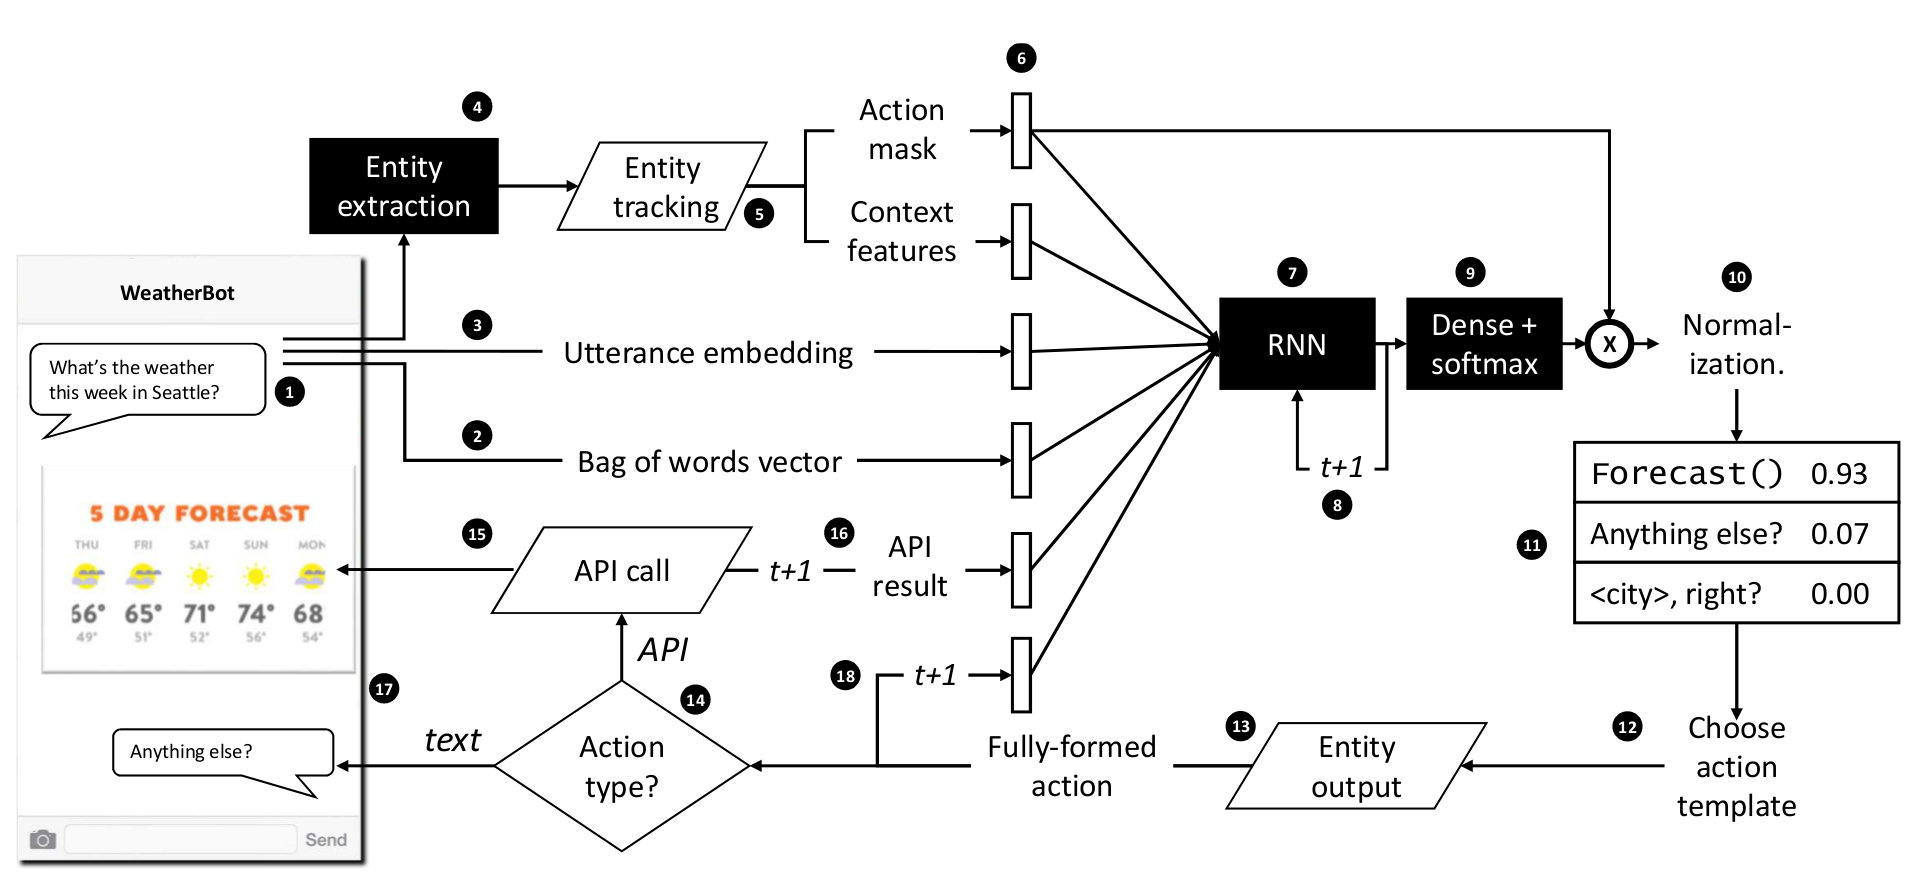

#### * Point1 We can replace LSTM(Long Short Term Memory) with GRU(Gated Reuurent Unit) because it has only two gates (Update and Reset) and more robust, and computationlly less expensive than LSTMs  and it has been proved that GRUs outperforms LSTMs on shorter sentnces *

####  *Point2  We can add Dynamic Memory Network(DMN) because it is the state of the art in Q&A systems. Its uses both the semantic and episodic memory ispired by our Hippocampus. the idea was to allow a neural network to use an external data structure as memory storage, it learns where to retrieve the required memory from the memory bank in a supervised way.*

#### *Point3 We can allow user to submit article when the chatbot fails to respond to queries or requests submitted by the customer, this will help us to further optimize our chatbot for the better performance.*

####  *Piont3 As the hyperparametrs we can also add DropOut because it applies better on shorter sentences.*

#### *Point4  AdaDelta uses exponentially decaying average of 𝑔𝑡 which was our 2nd moment of gradient. But without using alpha that we were traditionally using as learning rate, it introduces 𝑥𝑡 which is the 2nd moment of 𝑣𝑡.

𝑔𝑡+1=𝛾𝑔𝑡+(1−𝛾)▽(𝜃)2

𝑥𝑡+1=𝛾𝑥𝑡+(1−𝛾)𝑣2𝑡+1

𝑣𝑡+1=−𝑥𝑡+𝜖‾‾‾‾‾‾√𝛿𝐿(𝜃𝑡)𝑔𝑡+1+𝜖‾‾‾‾‾‾‾‾√

𝜃𝑡+1=𝜃𝑡+𝑣𝑡+1

#### *Point5 The key for a bot to understand the humans is it's ability to understand the intensions of humans and extraction of revelvant information from that intension and of course relevant action againt the information

### I have made a simple tweeter bot using twitter api.

 this is the sample code for that



In [2]:
import tweepy
import time
#from keys import *


print('this is my twitter bot', flush=True)

# Step 1 - Authenticate
consumer_key= 'wM0bhrkYkUmUXD5sHse1x4izb'
consumer_secret= 'DfKr1Gz1csCqwO1xffDsqJSlbap19FQVTmfaRebjZJfvm0cSP7'

access_token='4079418192-NWaeB2nk6xs6zmqCwxsUQR5XV2V4vE3WUrlSsP0'
access_token_secret='2108oCkG7AW7msmP21Hlt4YdkwD3PBSbClV9dSsIgnYe4'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

FILE_NAME = 'last_seen_id.txt'

def retrieve_last_seen_id(file_name):
    f_read = open(file_name, 'r')
    last_seen_id = int(f_read.read().strip())
    f_read.close()
    return last_seen_id

def store_last_seen_id(last_seen_id, file_name):
    f_write = open(file_name, 'w')
    f_write.write(str(last_seen_id))
    f_write.close()
    return

def reply_to_tweets():
    print('retrieving and replying to tweets...', flush=True)
    # DEV NOTE: use 1060651988453654528 for testing.
    last_seen_id = retrieve_last_seen_id(FILE_NAME)
    # NOTE: We need to use tweet_mode='extended' below to show
    # all full tweets (with full_text). Without it, long tweets
    # would be cut off.
    mentions = api.mentions_timeline(
                        last_seen_id,
                        tweet_mode='extended')
    for mention in reversed(mentions):
        print(str(mention.id) + ' - ' + mention.full_text, flush=True)
        last_seen_id = mention.id
        store_last_seen_id(last_seen_id, file_name)
        if '#helloworld' in mention.full_text.lower():
            print('found #helloworld!', flush=True)
            print('responding back...', flush=True)
            api.update_status('@' + mention.user.screen_name +
                    '#HelloWorld back to you!', mention.id)

while True:
    reply_to_tweets()
    time.sleep(15)

this is my twitter bot
retrieving and replying to tweets...


FileNotFoundError: [Errno 2] No such file or directory: 'last_seen_id.txt'